In real world scenerios, its rare to see univariate linear regression. Most likely the target depends on not one but many features. Univariate example was **Predicting house prices** based solely on **square footage.** But we know that it's not the norm. 

House prices doesn't depend only on the area but, also on many other factors such as:
- no. of bedrooms
- no. of bathrooms
- location
- year-built
- no. of stories
- and so on...

### Multivariate Linear Regression 
Meaning "many", so it involves multiple features(or independent variables). Using a hyperplane (rather than a simple line) in a multidimensinal spaces that explains the relationship between these features and the ytarget variable.

Example: **Predicting house prices** based on **n** # of features.

**Correlation:** tells us whether an increase (or decrease) in one variable is associated with an increase (or decrease) in another variable.
- **Positive Correlation:** If two variables have a positive correlation (one increases, the other increases). Example: height and weight typically have a positive correlation.
- **Negative Correlation:** (one increase, the other decreases). Example: as temperature increases, warm clothes sales might decrease.
- **No Correlation:** Changes in one variable do not predict changes in the other.

Correlation vales range from -1 to 1. 
- +1 indicates perfect correlation
- -1 indicates a perfect negative
- 0 indicates no correlation

Correlation helps identify relationships in data, which can inform feature selection, hypothesis testing, and explanatory analysis. Check out Pearson's Correlation, Spearman's Rank and Kendall's Tau.

**Feature Selection:** ML process that involves selecting relevant features from a dataset to use in your model construction, to improve the performance while reducing computational cost. For example, **only selecting square footage and location out of n # of features** to create regression model for predicting the price of a house.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
# Load dataset
data_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
df = pd.read_csv(data_url)

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# Print rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# Drop rows with missing values and select some features
df = df.dropna()
features = ['horsepower', 'weight', 'displacement', 'acceleration', 'cylinders']
target = 'mpg'

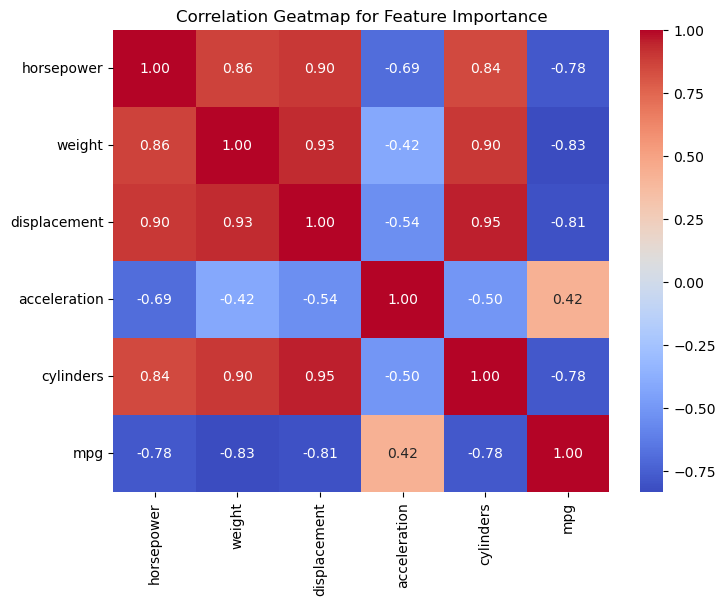

In [6]:
# Calculate correlation matrix
correlation_matrix = df[features + [target]].corr()

# Plot heatmap of feature importance
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Geatmap for Feature Importance')
plt.show()

**Note:** We see that 'horsepower', 'weight', 'displacement' and 'cylinders' have higher correlation to the target variable 'mpg' so we will proceed with those variables only for further processing. This is an example of **Feature Selection.**

In [7]:
# Select features from the correlation matrix and use mpg as the target variable
X = df[['horsepower', 'weight', 'displacement','cylinders']].values
y = df['mpg'].values

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 17.89


**Note:** taking the square root of MSE gives us the Root MSE (RMSE) which will make the error more interpretable, as it will be in the same units as the target variable (MPG).

In this case, RMSE = SQRT(17.89) = 4.23, which means the model's predictions are, on average about 4.23 MPG off from the true values.

**This is what we call a baseline model** which is in an initial model, and a data scientist then works further to improve the model performance and to minimize loss by model tuning or feature engineering or using more complex models.

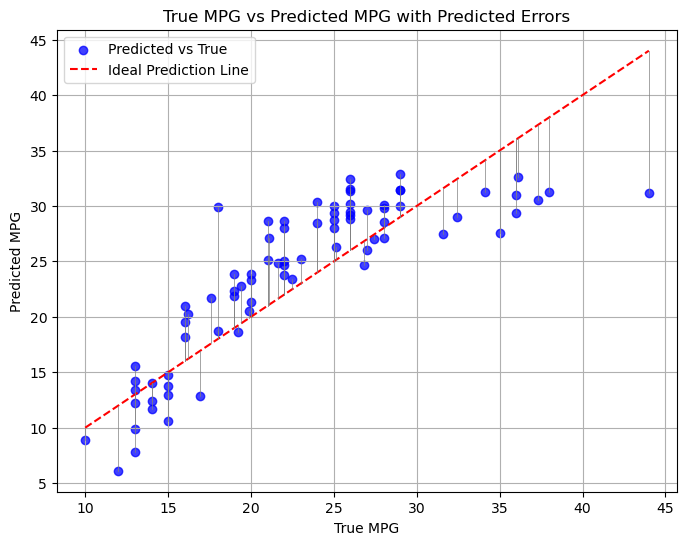

In [12]:
# Plot the true vs predicted mpg
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='blue', label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')

#Calculate and plot prediction score errors
for (true_value, predicted_value) in zip(y_test, y_pred):
    plt.plot([true_value, true_value], [true_value, predicted_value], color='gray', linestyle='-', linewidth=0.5)

plt.xlabel("True MPG")
plt.ylabel("Predicted MPG")
plt.title("True MPG vs Predicted MPG with Predicted Errors")
plt.legend()
plt.grid(True)
plt.show()

**Note:** this shows the relationship between true MPG values and the predicted MPG values generated by a linear regression model. It also includes prediction errors and an ideal prediction line.
- True MPG represents the **actual** MPG values from the test dataset. These are the real values the model is trying to predict.
- Predicted MPG represents the **predicted** MPG values generated by the model for data point in the tests set.
- Each blue dot represents a single prediction made by the model. The **vertical lines** extending from each **dot to the red dashed line** show the **error** in prediction (the difference between the true and predicted values).
- Red Dashed Line is a **45-degree line** that represents **perfect predictions.** If the model's predictions were perfect, all points would lie on this line. Points above the line indicate **over-predictions** (MPG is higher than actual), while the ponts below ia **under-predictions.**
- The vertical lines between each point and the red dashed line indicate the **prediction error** for each individual point.

---

### Observations
- The points generally cluster close to the ideal prediction line, indicating that the model is performing fairly well overall. Most predictions are close to the actual values.
- The plot shows a generally **positive linear trend**, meaning the predicted MPG values increase with the true MPG values, which is expected in a good regression model.
- The model captures the trend well, but there are still deviations, especially for higher MPG values. This could indicate the model performs better on certain ranges of MPG but, struggles with higher values.
- Overall, this is a good starting point, and the baseline can be further improved with advanced data science techniques.

**Skills Gained:**
- Downloaded and cleaned a dataset
- Created a multivariate linear regression model to find the best-fit plane
- Evaluated the model using MSE metric
- Plotted diagrams to better understand the results